# Model Training 

## Random Forests

In [64]:
#Import library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
#df=airbnb
df = airbnb.copy()

In [66]:
#Checking airbnb copy(df) shape
df.shape

(24440, 174)

In [67]:
#Detailed representation of df columns
pd.set_option('display.max_rows', None)
list(df.columns)

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'Adalar',
 'Arnavutkoy',
 'Atasehir',
 'Avcilar',
 'B

In [68]:
#Drop out of classes in property_type with less than 158 members
df.drop(['Private room in loft','Room in serviced apartment','Shared room in hostel','Private room in hostel',
'Private room in villa','Room in bed and breakfast','Shared room in house','Private room in casa particular',
'Tiny house','Private room in guesthouse','Room in hostel','Shared room in serviced apartment',
'Shared room in yurt','Shared room in condominium','Private room in tiny house','Private room in guest suite',
'Entire guesthouse','Entire guest suite','Shared room in bed and breakfast','Shared room in townhouse',
'Farm stay','Casa particular','Camper/RV','Entire bed and breakfast','Shared room in boutique hotel',
'Entire cottage','Private room in nature lodge','Entire bungalow','Shared room in loft','Entire place',
'Earth house','Private room in yurt','Boat','Shared room in aparthotel','Entire chalet',
'Private room in treehouse','Castle','Private room in farm stay','Shared room in tiny house',
'Private room in earth house','Shared room in guesthouse','Shared room in hotel',
'Shared room in casa particular','Shared room in villa','Private room in boat','Shared room in guest suite',
'Shared room in earth house','Lighthouse','Dome house','Private room in chalet','Private room in pousada',
'Room in pension','Private room in tent','Private room in bungalow','Island','Entire hostel','Tent',
'Private room in pension','Private room in cabin','Private room in hut','Private room in castle','Yurt',
'Room in nature lodge','Campsite','Private room in camper/rv','Shared room in cabin','Treehouse',
'Room in casa particular','Shared room in cave','Shared room in pension','Private room in houseboat',
'Shared room in chalet','Hut','Windmill','Shared room in nature lodge'],axis=1,inplace=True)


In [69]:
#Drop features that are not required for the Airbnb Price Determinant Platform
df.drop(['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',],axis=1,inplace=True)

In [70]:
#Checking airbnb copy(df) shape
df.shape

(24440, 65)

In [71]:
pd.set_option('display.max_rows', None)
list(df.columns)

['bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'Adalar',
 'Arnavutkoy',
 'Atasehir',
 'Avcilar',
 'Bagcilar',
 'Bahcelievler',
 'Bakirkoy',
 'Basaksehir',
 'Bayrampasa',
 'Besiktas',
 'Beykoz',
 'Beylikduzu',
 'Beyoglu',
 'Buyukcekmece',
 'Catalca',
 'Cekmekoy',
 'Esenler',
 'Esenyurt',
 'Eyup',
 'Fatih',
 'Gaziosmanpasa',
 'Gungoren',
 'Kadikoy',
 'Kagithane',
 'Kartal',
 'Kucukcekmece',
 'Maltepe',
 'Pendik',
 'Sancaktepe',
 'Sariyer',
 'Sile',
 'Silivri',
 'Sisli',
 'Sultanbeyli',
 'Sultangazi',
 'Tuzla',
 'Umraniye',
 'Uskudar',
 'Zeytinburnu',
 'Entire apartment',
 'Entire condominium',
 'Entire house',
 'Entire loft',
 'Entire serviced apartment',
 'Entire townhouse',
 'Entire villa',
 'Private room in apartment',
 'Private room in bed and breakfast',
 'Private room in condominium',
 'Private room in house',
 'Private room in serviced apartment',
 'Private room in townhouse',
 'Room in aparthotel',
 'Room in boutique hotel',
 'Room in hotel',
 'Shared room in apartment',
 'H

In [72]:
#TEST 0
#rf_model mean_squared_error=591.1337311190539
#rf_tuned mean_squared_error=580.4197063127456
#feature 65

In [73]:
#TEST 1
#rf_model mean_squared_error=587.636855459673
#rf_tuned mean_squared_error=573.014077177704
#feature 65->47
#dropped 0.0... and 0.00...
df.drop(['Atasehir','Avcilar','Bagcilar','Bahcelievler','Bakirkoy','Bayrampasa','Beylikduzu','Catalca','Cekmekoy',
'Esenler','Gaziosmanpasa','Gungoren','Kartal','Pendik','Sancaktepe','Sultanbeyli','Sultangazi','Tuzla'],axis=1,inplace=True)

***Atasehir   0.080843<br>
Avcilar       0.059768<br>
Bagcilar      0.040850<br>
Bahcelievler  0.048892<br>
Bakirkoy      0.079385<br>
Bayrampasa    0.010626<br>
Beylikduzu    0.067246<br>
Catalca       0.031474<br>
Cekmekoy      0.031351<br>
Esenler       0.007115<br>
Gaziosmanpasa 0.088927<br>
Gungoren      0.004676<br>
Kartal        0.050583<br>
Pendik        0.031014<br>
Sancaktepe    0.017832<br>
Sultanbeyli   0.003509<br>
Sultangazi    0.004400<br>
Tuzla         0.068309<br>***

In [74]:
#TEST 2
#rf_model mean_squared_error=582.4553412408425
#rf_tuned mean_squared_error=566.8661631212707
#feature 47->40
#dropped 0.1... and 0.2...
df.drop(['Entire loft','Entire condominium','Entire townhouse','Entire serviced apartment','Private room in condominium',
'Private room in townhouse','Room in aparthotel'],axis=1,inplace=True)

***Entire loft                           0.085276<br>
Entire condominium                    0.185649<br>
Entire townhouse                      0.110871<br>
Entire serviced apartment             0.243123<br>
Private room in condominium           0.212524<br>
Private room in townhouse             0.287370<br>
Room in aparthotel                    0.211855<br>***

In [75]:
#TEST 3
#rf_model mean_squared_error=584.1681538477367
#rf_tuned mean_squared_error=566.5669808099515
#feature 40->34
#dropped 0.2... and 0.3... 0.5...
df.drop(['Private room in house','Private room in serviced apartment','Shared room in apartment','Hotel room','Private room in bed and breakfast'],axis=1,inplace=True)

***Private room in house                 0.316958<br>
Private room in serviced apartment    0.269792<br>
Shared room in apartment              0.297676<br>
Hotel room                            0.389874<br>***

In [76]:
#TEST 4
#rf_model mean_squared_error=583.7062865939537
#rf_tuned mean_squared_error=566.485489050685
#feature 34->32
#dropped unnecessary features
df.drop(['Room in boutique hotel','Room in hotel'],axis=1,inplace=True)

***Private room in bed and breakfast    0.704659<br>
Room in boutique hotel               0.458505<br>
Room in hotel                        0.644327<br>***

In [77]:
#Checking airbnb copy(df) shape
df.shape

(24440, 32)

## Data Train-Test Split

In [78]:
y = df["price"]
X= df.drop(['price'], axis=1).astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Prediction

In [79]:
rf_model = RandomForestRegressor(random_state = 42)

In [80]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [81]:
rf_model.predict(X_test)[0:5]

array([232.30698457, 368.60587138, 266.8695605 , 577.5       ,
       440.26363387])

In [82]:
y_pred = rf_model.predict(X_test)

In [83]:
np.sqrt(mean_squared_error(y_test, y_pred))

583.7062865939537

## Model Tuning

In [84]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [85]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [86]:
y_pred = rf_tuned.predict(X_test)

In [87]:
#MSE error checking
np.sqrt(mean_squared_error(y_test, y_pred))

566.485489050685

In [88]:
#Feature importance checking
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)
pd.set_option('display.max_rows', None)
print(Importance)

                           Importance
bathrooms_text              21.309205
bedrooms                    19.060193
beds                        12.608117
Adalar                       0.188413
Arnavutkoy                   0.595040
Basaksehir                   0.141514
Besiktas                     0.221172
Beykoz                       1.892554
Beyoglu                      0.464671
Buyukcekmece                 0.532122
Esenyurt                     0.511301
Eyup                         0.065111
Fatih                        0.889680
Kadikoy                      0.577528
Kagithane                    0.218638
Kucukcekmece                 0.226854
Maltepe                      0.182769
Sariyer                      5.010856
Sile                         0.303564
Silivri                      0.521215
Sisli                        0.444527
Umraniye                     0.080556
Uskudar                      0.194852
Zeytinburnu                  0.541656
Entire apartment             1.657898
Entire house

Text(0.5, 0, 'Değişken Önem Düzeyleri')

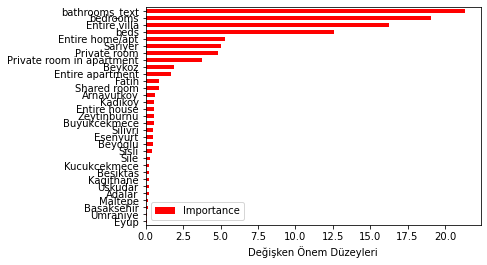

In [89]:
#Sorting importance values
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [90]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 252.4465753315925
Mean Squared Error: 320905.8093049938
Root Mean Squared Error: 566.485489050685


## Examine the remaining features after feature importance

In [91]:
#Detailed representation these features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24440 entries, 0 to 24518
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bathrooms_text             24440 non-null  float64
 1   bedrooms                   24440 non-null  float64
 2   beds                       24440 non-null  float64
 3   price                      24440 non-null  int64  
 4   Adalar                     24440 non-null  uint8  
 5   Arnavutkoy                 24440 non-null  uint8  
 6   Basaksehir                 24440 non-null  uint8  
 7   Besiktas                   24440 non-null  uint8  
 8   Beykoz                     24440 non-null  uint8  
 9   Beyoglu                    24440 non-null  uint8  
 10  Buyukcekmece               24440 non-null  uint8  
 11  Esenyurt                   24440 non-null  uint8  
 12  Eyup                       24440 non-null  uint8  
 13  Fatih                      24440 non-null  uin

# Save Model

## Joblib Module

In [92]:
#from sklearn.externals import joblib
import joblib

# Save to file in the current working directory
joblib_file = "joblib_model_2.pkl"
joblib.dump(rf_tuned, joblib_file)

# Load from file
joblib_model = joblib.load(joblib_file)


In [93]:
Ypredict = joblib_model.predict(X_test)
Ypredict

array([405.53592704, 422.40691729, 302.87316597, ..., 444.4288604 ,
       351.39750575, 413.71503315])

In [94]:
rf_tuned.predict(X_test)

array([405.53592704, 422.40691729, 302.87316597, ..., 444.4288604 ,
       351.39750575, 413.71503315])

## Pickle Module

In [95]:
import pickle

In [96]:
# Save to file in the current working directory
pkl_filename = "pickle_model_2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_tuned, file)

In [97]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [98]:
Ypredict_pickle = pickle_model.predict(X_test)
Ypredict_pickle

array([405.53592704, 422.40691729, 302.87316597, ..., 444.4288604 ,
       351.39750575, 413.71503315])

In [99]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6110 entries, 15329 to 22259
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   bathrooms_text             6110 non-null   int64
 1   bedrooms                   6110 non-null   int64
 2   beds                       6110 non-null   int64
 3   Adalar                     6110 non-null   int64
 4   Arnavutkoy                 6110 non-null   int64
 5   Basaksehir                 6110 non-null   int64
 6   Besiktas                   6110 non-null   int64
 7   Beykoz                     6110 non-null   int64
 8   Beyoglu                    6110 non-null   int64
 9   Buyukcekmece               6110 non-null   int64
 10  Esenyurt                   6110 non-null   int64
 11  Eyup                       6110 non-null   int64
 12  Fatih                      6110 non-null   int64
 13  Kadikoy                    6110 non-null   int64
 14  Kagithane          

In [100]:
print(y_pred)

[405.53592704 422.40691729 302.87316597 ... 444.4288604  351.39750575
 413.71503315]


In [101]:
X_test.bathrooms_text.unique()

array([ 1,  2,  4,  3,  6,  5,  0, 12,  8, 13, 10,  7, 14, 20, 22, 18, 25,
       15, 24, 30], dtype=int64)

In [102]:
X_test.bedrooms.unique()

array([ 1,  2,  3,  4,  5,  6, 12,  7, 15,  8, 35, 10, 14, 20, 22, 50, 19,
       16, 18, 25,  9, 24, 48], dtype=int64)

In [103]:
X_test.beds.unique()

array([ 2,  3,  1,  5,  0,  6,  4, 18, 10,  7, 14,  8, 22,  9, 20, 15, 32,
       34, 16, 13, 35, 50, 11, 24, 37, 12, 17], dtype=int64)

In [104]:
X_test["Shared room"].unique()

array([0, 1], dtype=int64)